In [3]:
pip install pandas plotly prophet openpyxl


In [4]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [9]:

df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(0, inplace=True)

In [11]:
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [12]:
india_df = df[df['Country/Region'] == 'India']
india_df = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [13]:
fig = px.line(global_df, x='Date', y=['Confirmed', 'Recovered', 'Deaths'],
              title='Global COVID-19 Trend')
fig.show()

In [14]:
fig = px.line(india_df, x='Date', y=['Confirmed', 'Recovered', 'Deaths'],
              title='India COVID-19 Trend')
fig.show()

In [15]:
prophet_df = india_df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [16]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinxde6kk/vldy_h8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinxde6kk/esovg9jy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19418', 'data', 'file=/tmp/tmpinxde6kk/vldy_h8k.json', 'init=/tmp/tmpinxde6kk/esovg9jy.json', 'output', 'file=/tmp/tmpinxde6kk/prophet_modeluwyy7y2c/prophet_model-20250506131142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

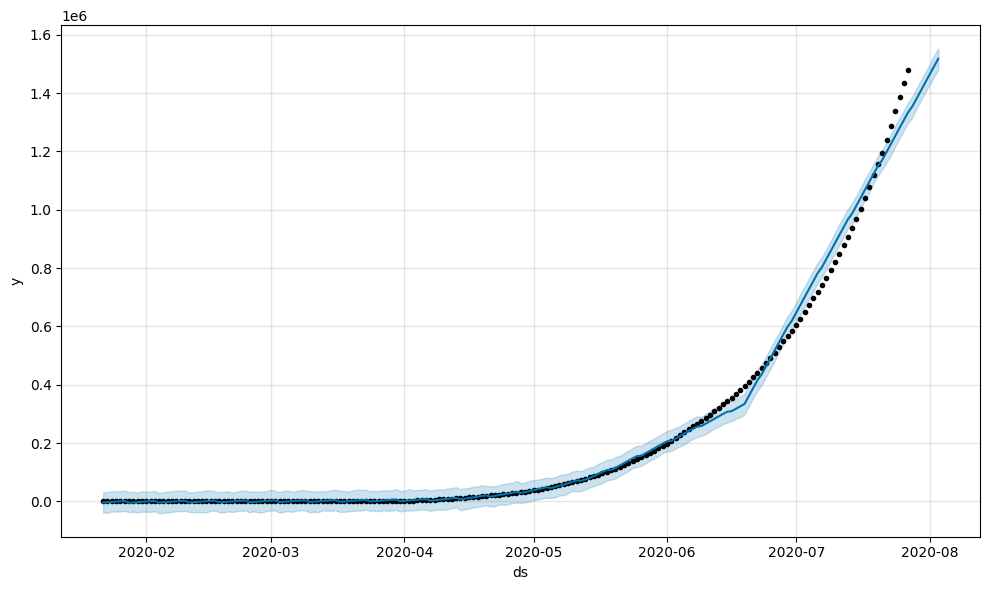

In [18]:
model.plot(forecast);

In [19]:
forecast_df = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Predicted'})
merged_df = pd.merge(india_df[['Date', 'Confirmed']], forecast_df, on='Date', how='outer')

In [20]:
fig = px.line(merged_df, x='Date', y=['Confirmed', 'Predicted'],
              title='India COVID-19 Actual vs Forecasted Confirmed Cases')
fig.show()